1) Usando AWS EMR, leer el dataset de taxis de NYC para los meses de junio, julio y agosto de 2019:

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=a4288a7bdb7168fd35d28985fc2a85fd6da06cadb7c9b17017b8b795db877dee
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, avg, desc, date_format, unix_timestamp
from pyspark.sql import functions as F
import plotly.express as px
from google.colab import drive

In [3]:
spark = SparkSession.builder.getOrCreate()

In [4]:
drive.mount('/content/drive')
zip_file_path1 = "/content/drive/MyDrive/Octavo/Big Data/green_tripdata_2019-06.csv"
zip_file_path2 = "/content/drive/MyDrive/Octavo/Big Data/green_tripdata_2019-07.csv"
zip_file_path3 = "/content/drive/MyDrive/Octavo/Big Data/green_tripdata_2019-08.csv"

Mounted at /content/drive


In [5]:
df_june = spark.read.csv(zip_file_path1, inferSchema=True, header=True)
df_july = spark.read.csv(zip_file_path2, inferSchema=True, header=True)
df_august = spark.read.csv(zip_file_path3, inferSchema=True, header=True)

df_taxis = df_june.union(df_july).union(df_august)

In [6]:
df_taxis.show()

+--------+--------------------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+--------------------+
|VendorID|lpep_pickup_datetime|lpep_dropoff_datetime|store_and_fwd_flag|RatecodeID|PULocationID|DOLocationID|passenger_count|trip_distance|fare_amount|extra|mta_tax|tip_amount|tolls_amount|ehail_fee|improvement_surcharge|total_amount|payment_type|trip_type|congestion_surcharge|
+--------+--------------------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+--------------------+
|       2| 2019-06-01 00:25:27|  2019-06-01 00:33:52|                 N|         1|          74|         263|              5|         2.34|        9.0|  0.5|    0.

In [7]:
df_taxis.count()

1391490

In [8]:
df_taxis.printSchema()

root
 |-- VendorID: integer (nullable = true)
 |-- lpep_pickup_datetime: timestamp (nullable = true)
 |-- lpep_dropoff_datetime: timestamp (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- RatecodeID: integer (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- passenger_count: integer (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- ehail_fee: string (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- payment_type: integer (nullable = true)
 |-- trip_type: integer (nullable = true)
 |-- congestion_surcharge: double (nullable = true)



cargar archivo de zonas en otro dataframe:


s3://nyc-tlc/misc/taxi _zone_lookup.csv


In [9]:
zip_file_path4 = "/content/drive/MyDrive/Octavo/Big Data/taxi _zone_lookup.csv"

df_zones = spark.read.csv(zip_file_path4, inferSchema=True, header=True)

In [10]:
df_zones.show()

+----------+-------------+--------------------+------------+
|LocationID|      Borough|                Zone|service_zone|
+----------+-------------+--------------------+------------+
|         1|          EWR|      Newark Airport|         EWR|
|         2|       Queens|         Jamaica Bay|   Boro Zone|
|         3|        Bronx|Allerton/Pelham G...|   Boro Zone|
|         4|    Manhattan|       Alphabet City| Yellow Zone|
|         5|Staten Island|       Arden Heights|   Boro Zone|
|         6|Staten Island|Arrochar/Fort Wad...|   Boro Zone|
|         7|       Queens|             Astoria|   Boro Zone|
|         8|       Queens|        Astoria Park|   Boro Zone|
|         9|       Queens|          Auburndale|   Boro Zone|
|        10|       Queens|        Baisley Park|   Boro Zone|
|        11|     Brooklyn|          Bath Beach|   Boro Zone|
|        12|    Manhattan|        Battery Park| Yellow Zone|
|        13|    Manhattan|   Battery Park City| Yellow Zone|
|        14|     Brookly

In [11]:
df_zones.count()

265

In [12]:
df_zones.printSchema()

root
 |-- LocationID: integer (nullable = true)
 |-- Borough: string (nullable = true)
 |-- Zone: string (nullable = true)
 |-- service_zone: string (nullable = true)



2) Escribir los respectivos programas en Spark usando Dataframes para realizar las siguientes consultas:

1.		Distancia 	Promedio de un recorrido en Taxi NYC

2.		Cuántas 	formas de pago hay?

3.		Vendor 	con mayor número de viajes

4.		Listar 	número de viajes por dia en el mes de junio de 2019

5.		Área 	donde se recoge mayor número de pasajeros

6.		Número 	de viajes que se dirigieron al “Bronx”

7.		Número 	promedio de personas por viaje que se dirigen al aeropuerto JFK

8.		Distancia 	y Costo promedio de tomar un taxi del Aeropuerto JFK a Manhattan 	Valley

9.		Cual 	es el recorrido más frencuente(entre qué zona y qué zona)

10.		Tiempo 	Promedio de un viaje. (Utilizar F.unix_timestamp sobre las horas en 	las que se recogiò y dejò al pasajero y restarlas para encontrar 	el tiempo del recorrido)



1) Distancia Promedio de un recorrido en Taxi NYC

In [13]:
distancia_promedio = df_taxis.select(avg(col("trip_distance"))).collect()[0][0]

print("Distancia Promedio de un recorrido en Taxi NYC:", distancia_promedio)

Distancia Promedio de un recorrido en Taxi NYC: 3.257110449949341


2) Cuántas formas de pago hay?

In [14]:
formas_de_pago = df_taxis.select("payment_type").distinct().count()

print("Número de formas de pago:", formas_de_pago)

Número de formas de pago: 6


In [15]:
formas_de_pago_distintas = df_taxis.select("payment_type").distinct().collect()
formas_de_pago_distintas

[Row(payment_type=1),
 Row(payment_type=3),
 Row(payment_type=5),
 Row(payment_type=4),
 Row(payment_type=2),
 Row(payment_type=None)]

3) Vendor con mayor número de viajes

In [16]:
vendor_con_mas_viajes = df_taxis.groupBy("VendorID").count().orderBy(desc("count")).first()

print("Vendor con mayor número de viajes:", vendor_con_mas_viajes["VendorID"])

Vendor con mayor número de viajes: 2


4) Listar número de viajes por dia en el mes de junio de 2019

In [17]:
df_junio_2019 = df_taxis.filter((col("lpep_pickup_datetime") >= "2019-06-01") & (col("lpep_pickup_datetime") < "2019-07-01"))

viajes_por_dia = df_junio_2019.groupBy(date_format("lpep_pickup_datetime", "yyyy-MM-dd").alias("Fecha")).count().orderBy("Fecha")

viajes_por_dia.show()

+----------+-----+
|     Fecha|count|
+----------+-----+
|2019-06-01|17491|
|2019-06-02|15149|
|2019-06-03|15128|
|2019-06-04|11581|
|2019-06-05|14994|
|2019-06-06|16707|
|2019-06-07|17961|
|2019-06-08|16972|
|2019-06-09|14174|
|2019-06-10|15096|
|2019-06-11|15090|
|2019-06-12|15588|
|2019-06-13|17285|
|2019-06-14|17601|
|2019-06-15|17105|
|2019-06-16|13973|
|2019-06-17|14962|
|2019-06-18|15545|
|2019-06-19|16194|
|2019-06-20|16835|
+----------+-----+
only showing top 20 rows



In [18]:
viajes_por_dia_pandas = viajes_por_dia.toPandas()

fig = px.bar(viajes_por_dia_pandas, x="Fecha", y="count", title="Número de Viajes por Día en Junio de 2019")
fig.update_xaxes(title_text="Fecha")
fig.update_yaxes(title_text="Número de Viajes")

fig.show()

5) Área donde se recoge mayor número de pasajeros

In [19]:
df_taxis = df_taxis.join(df_zones, df_taxis.PULocationID == df_zones.LocationID)

In [20]:
df_taxis.show()

+--------+--------------------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+--------------------+----------+---------+--------------------+------------+
|VendorID|lpep_pickup_datetime|lpep_dropoff_datetime|store_and_fwd_flag|RatecodeID|PULocationID|DOLocationID|passenger_count|trip_distance|fare_amount|extra|mta_tax|tip_amount|tolls_amount|ehail_fee|improvement_surcharge|total_amount|payment_type|trip_type|congestion_surcharge|LocationID|  Borough|                Zone|service_zone|
+--------+--------------------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+--------------------+----------+---------+--------------------+------------

In [21]:
ubicacion_pasajeros = df_taxis.groupBy("PULocationID").agg(sum("passenger_count").alias("Total_Pasajeros"))

ubicacion_mas_pasajeros = ubicacion_pasajeros.orderBy(col("Total_Pasajeros").desc()).first()

print("Área con el mayor número de pasajeros (PULocationID):", ubicacion_mas_pasajeros["PULocationID"])
print("Número total de pasajeros en esa área:", ubicacion_mas_pasajeros["Total_Pasajeros"])

Área con el mayor número de pasajeros (PULocationID): 74
Número total de pasajeros en esa área: 150093


In [22]:
nombres_de_zonas = df_zones.select("Zone").distinct().orderBy(col("Zone")).rdd.map(lambda row: row[0]).collect()
nombres_de_zonas

['Allerton/Pelham Gardens',
 'Alphabet City',
 'Arden Heights',
 'Arrochar/Fort Wadsworth',
 'Astoria',
 'Astoria Park',
 'Auburndale',
 'Baisley Park',
 'Bath Beach',
 'Battery Park',
 'Battery Park City',
 'Bay Ridge',
 'Bay Terrace/Fort Totten',
 'Bayside',
 'Bedford',
 'Bedford Park',
 'Bellerose',
 'Belmont',
 'Bensonhurst East',
 'Bensonhurst West',
 'Bloomfield/Emerson Hill',
 'Bloomingdale',
 'Boerum Hill',
 'Borough Park',
 'Breezy Point/Fort Tilden/Riis Beach',
 'Briarwood/Jamaica Hills',
 'Brighton Beach',
 'Broad Channel',
 'Bronx Park',
 'Bronxdale',
 'Brooklyn Heights',
 'Brooklyn Navy Yard',
 'Brownsville',
 'Bushwick North',
 'Bushwick South',
 'Cambria Heights',
 'Canarsie',
 'Carroll Gardens',
 'Central Harlem',
 'Central Harlem North',
 'Central Park',
 'Charleston/Tottenville',
 'Chinatown',
 'City Island',
 'Claremont/Bathgate',
 'Clinton East',
 'Clinton Hill',
 'Clinton West',
 'Co-Op City',
 'Cobble Hill',
 'College Point',
 'Columbia Street',
 'Coney Island',
 

In [23]:
nombre_de_zona = df_zones.filter(col("LocationID") == ubicacion_mas_pasajeros["PULocationID"]).select("Zone").first()[0]

print("Nombre de la zona con el mayor número de pasajeros:", nombre_de_zona)

Nombre de la zona con el mayor número de pasajeros: East Harlem North


In [24]:
conteo_pasajeros_por_area = df_taxis.groupBy("PULocationID").agg(sum("passenger_count").alias("Total_Pasajeros"))

conteo_pasajeros_por_area = conteo_pasajeros_por_area.join(df_zones, conteo_pasajeros_por_area.PULocationID == df_zones.LocationID)

In [25]:
conteo_pasajeros_por_area_pandas = conteo_pasajeros_por_area.toPandas()

fig = px.bar(conteo_pasajeros_por_area_pandas, x="Zone", y="Total_Pasajeros", title="Número de Pasajeros por Área de Recogida")

# Personaliza el diseño de la figura
fig.update_xaxes(title_text="Área de Recogida", tickangle=-45)
fig.update_yaxes(title_text="Total de Pasajeros")
fig.update_layout(width=1200, height=600, xaxis=dict(categoryorder='total ascending'))

# Añade etiquetas en los bares
fig.update_traces(texttemplate='%{y}', textposition='outside')

# Muestra el nombre de todas las zonas
fig.update_layout(xaxis={'categoryorder': 'total ascending'})

# Muestra el histograma
fig.show()

6) Número de viajes que se dirigieron al “Bronx”

In [26]:
nombres_de_distritos = df_zones.select("Borough").distinct().orderBy(col("Borough")).rdd.map(lambda row: row[0]).collect()
nombres_de_distritos

['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island', 'Unknown']

In [27]:
viajes_al_bronx = df_taxis.filter(col("Borough") == "Bronx")

numero_de_viajes_al_bronx = viajes_al_bronx.count()

print("Número de viajes que se dirigieron al Bronx:", numero_de_viajes_al_bronx)

Número de viajes que se dirigieron al Bronx: 92922


In [28]:
conteo_viajes_por_distrito = df_taxis.groupBy("Borough").count()

conteo_viajes_por_distrito_pandas = conteo_viajes_por_distrito.toPandas()

In [29]:
fig = px.bar(conteo_viajes_por_distrito_pandas, x="Borough", y="count", title="Número de Viajes por Distrito (Borough)")
fig.update_xaxes(title_text="Distrito (Borough)", tickangle=-45)
fig.update_yaxes(title_text="Número de Viajes")
fig.update_layout(width=1000, height=500, xaxis=dict(categoryorder='total descending'))
fig.update_traces(texttemplate='%{y}', textposition='outside')

fig.show()

7) Número promedio de personas por viaje que se dirigen al aeropuerto JFK

In [30]:
jfk_location_id = df_taxis.filter(col("Zone") == 'JFK Airport').select("DOLocationID").distinct().first()[0]

print("ID de 'JFK Airport' en la columna 'Zone':", jfk_location_id)

ID de 'JFK Airport' en la columna 'Zone': 132


In [31]:
viajes_al_JFK = df_taxis.filter(df_taxis["DOLocationID"] == 132)

promedio_personas_al_JFK = viajes_al_JFK.select(avg("passenger_count")).collect()[0][0]

print("Número promedio de personas por viaje al aeropuerto JFK:", promedio_personas_al_JFK)

Número promedio de personas por viaje al aeropuerto JFK: 1.3166243654822336


8) Distancia y Costo promedio de tomar un taxi del Aeropuerto JFK a Manhattan Valley

In [32]:
manhattan_valley_id = df_taxis.filter(col("Zone") == 'Manhattan Valley').select("DOLocationID").distinct().first()[0]

print("ID de 'Manhattan Valley en la columna 'Zone':", manhattan_valley_id)

ID de 'Manhattan Valley en la columna 'Zone': 143


In [33]:
viajes_jfk_a_manhattan_valley = df_taxis.filter((col("PULocationID") == jfk_location_id) & (col("DOLocationID") == manhattan_valley_id))

distancia_promedio = viajes_jfk_a_manhattan_valley.select(avg("trip_distance")).collect()[0][0]

costo_promedio = viajes_jfk_a_manhattan_valley.select(avg("total_amount")).collect()[0][0]

print("Distancia promedio desde JFK Airport a Manhattan Valley:", distancia_promedio, "millas")
print("Costo promedio desde JFK Airport a Manhattan Valley:", costo_promedio, "dólares")

Distancia promedio desde JFK Airport a Manhattan Valley: None millas
Costo promedio desde JFK Airport a Manhattan Valley: None dólares


9) Cuál es el recorrido más frencuente(entre qué zona y qué zona) ?

In [34]:
recorrido_frecuente = df_taxis.groupBy("PULocationID", "DOLocationID").agg(F.count("*").alias("frecuencia")).orderBy(col("frecuencia"), ascending=False).first()

pu_location_id = recorrido_frecuente["PULocationID"]
do_location_id = recorrido_frecuente["DOLocationID"]
frecuencia = recorrido_frecuente["frecuencia"]

zona_recogida = df_zones.filter(col("LocationID") == pu_location_id).select("Zone").first()[0]
zona_entrega = df_zones.filter(col("LocationID") == do_location_id).select("Zone").first()[0]

print("El recorrido más frecuente es entre la zona:", zona_recogida, "y la zona:", zona_entrega)
print("Frecuencia:", frecuencia)

El recorrido más frecuente es entre la zona: East Harlem South y la zona: East Harlem North
Frecuencia: 17798


10) Tiempo Promedio de un viaje. (Utilizar F.unix_timestamp sobre las horas en las que se recogiò y dejò al pasajero y restarlas para encontrar el tiempo del recorrido)

In [35]:
# Convertir las columnas de tiempo a formato Unix Timestamp
df_taxis = df_taxis.withColumn("pickup_timestamp", unix_timestamp("lpep_pickup_datetime"))
df_taxis = df_taxis.withColumn("dropoff_timestamp", unix_timestamp("lpep_dropoff_datetime"))

In [36]:
# Calcular la duración del viaje en segundos
df_taxis = df_taxis.withColumn("duracion_viaje_segundos", col("dropoff_timestamp") - col("pickup_timestamp"))

In [37]:
# Calcular el tiempo promedio de viaje
tiempo_promedio_viaje = df_taxis.select(avg("duracion_viaje_segundos")).collect()[0][0]

# Convertir el tiempo promedio de viaje a minutos
tiempo_promedio_viaje_minutos = tiempo_promedio_viaje / 60

# Imprimir el resultado
print("Tiempo promedio de un viaje:", tiempo_promedio_viaje_minutos, "minutos")

Tiempo promedio de un viaje: 21.59321644424322 minutos


11) Mapa

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely import wkt

In [39]:
df_taxis.show()

+--------+--------------------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+--------------------+----------+---------+--------------------+------------+----------------+-----------------+-----------------------+
|VendorID|lpep_pickup_datetime|lpep_dropoff_datetime|store_and_fwd_flag|RatecodeID|PULocationID|DOLocationID|passenger_count|trip_distance|fare_amount|extra|mta_tax|tip_amount|tolls_amount|ehail_fee|improvement_surcharge|total_amount|payment_type|trip_type|congestion_surcharge|LocationID|  Borough|                Zone|service_zone|pickup_timestamp|dropoff_timestamp|duracion_viaje_segundos|
+--------+--------------------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------

In [40]:
data = [("Manhattan", 40.7128, -74.0060),
        ("Bronx", 40.8448, -73.8648),
        ("Brooklyn", 40.6782, -73.9442),
        ("Queens", 40.7282, -73.7949),
        ("Staten Island", 40.5795, -74.1502)]

schema = ["Borough", "Latitude", "Longitude"]

df_coordinates = spark.createDataFrame(data, schema=schema)

# Unir df_taxis y df_coordinates en función de la columna 'Borough'
df_taxis_with_coordinates = df_taxis.join(df_coordinates, on='Borough', how='left')

# Muestra el DataFrame resultante
df_taxis_with_coordinates.show()

+---------+--------+--------------------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+--------------------+----------+--------------------+------------+----------------+-----------------+-----------------------+--------+---------+
|  Borough|VendorID|lpep_pickup_datetime|lpep_dropoff_datetime|store_and_fwd_flag|RatecodeID|PULocationID|DOLocationID|passenger_count|trip_distance|fare_amount|extra|mta_tax|tip_amount|tolls_amount|ehail_fee|improvement_surcharge|total_amount|payment_type|trip_type|congestion_surcharge|LocationID|                Zone|service_zone|pickup_timestamp|dropoff_timestamp|duracion_viaje_segundos|Latitude|Longitude|
+---------+--------+--------------------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+-

In [41]:
# Selecciona las columnas deseadas
selected_columns = ["VendorID","passenger_count", "trip_distance", "fare_amount", "extra", "mta_tax", "tip_amount", "tolls_amount", "improvement_surcharge", "total_amount", "payment_type", "trip_type", "congestion_surcharge", "LocationID", "Borough", "Zone", "service_zone", "pickup_timestamp", "dropoff_timestamp", "duracion_viaje_segundos", "Latitude", "Longitude"]

df_taxis_with_coordinates = df_taxis_with_coordinates.select(selected_columns)

# Muestra el DataFrame resultante
df_taxis_with_coordinates.show()


+--------+---------------+-------------+-----------+-----+-------+----------+------------+---------------------+------------+------------+---------+--------------------+----------+---------+--------------------+------------+----------------+-----------------+-----------------------+--------+---------+
|VendorID|passenger_count|trip_distance|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|payment_type|trip_type|congestion_surcharge|LocationID|  Borough|                Zone|service_zone|pickup_timestamp|dropoff_timestamp|duracion_viaje_segundos|Latitude|Longitude|
+--------+---------------+-------------+-----------+-----+-------+----------+------------+---------------------+------------+------------+---------+--------------------+----------+---------+--------------------+------------+----------------+-----------------+-----------------------+--------+---------+
|       2|              5|         2.34|        9.0|  0.5|    0.5|       1.0|         0.0| 

In [42]:
# Convierte tu DataFrame de PySpark en uno de pandas
df_pandas = df_taxis_with_coordinates.toPandas()

In [43]:
#Here we are using geopandas to bring in a base layer of NYC boroughs
nyc = gpd.read_file(gpd.datasets.get_path('nybb'))
nyc.head(5)

<ipython-input-43-f759e6ee4cdb>:2: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'nybb' data from the geodatasets package.

from geodatasets import get_path
path_to_file = get_path('nybb')




,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [44]:
df_pandas.rename(columns={'Borough': 'boroname'}, inplace=True)

In [45]:
# Calculate the count of records grouped by 'Borough' in your df_pandas DataFrame
borough_count = df_pandas.groupby('boroname').count()

In [46]:
df_pandas.head()

,VendorID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,...,congestion_surcharge,LocationID,boroname,Zone,service_zone,pickup_timestamp,dropoff_timestamp,duracion_viaje_segundos,Latitude,Longitude
0,2.0,1.0,4.26,15.5,0.5,0.5,0.00,0.0,0.3,16.80,...,0.0,82,Queens,Elmhurst,Boro Zone,1559347388,1559348147,759,40.7282,-73.7949
1,2.0,1.0,2.87,11.5,0.5,0.5,2.56,0.0,0.3,15.36,...,0.0,82,Queens,Elmhurst,Boro Zone,1559348971,1559349658,687,40.7282,-73.7949
2,2.0,1.0,3.26,13.0,0.5,0.5,0.00,0.0,0.3,14.30,...,0.0,7,Queens,Astoria,Boro Zone,1559347845,1559348742,897,40.7282,-73.7949
3,2.0,1.0,1.18,7.0,0.5,0.5,0.00,0.0,0.3,8.30,...,0.0,82,Queens,Elmhurst,Boro Zone,1559349333,1559349787,454,40.7282,-73.7949
4,2.0,1.0,1.10,5.5,0.5,0.5,0.00,0.0,0.3,6.80,...,0.0,223,Queens,Steinway,Boro Zone,1559349257,1559349542,285,40.7282,-73.7949


In [47]:
nyc.rename(columns={'BoroName':'boroname'}, inplace=True)

bc_geo = nyc.merge(conteo_viajes_por_distrito_pandas, left_on='boroname', right_on='Borough')

In [48]:
bc_geo.head()

,BoroCode,boroname,Shape_Leng,Shape_Area,geometry,Borough,count
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227....",Staten Island,682
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957...",Queens,420400
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100...",Brooklyn,383262
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940....",Manhattan,491108
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278...",Bronx,92922


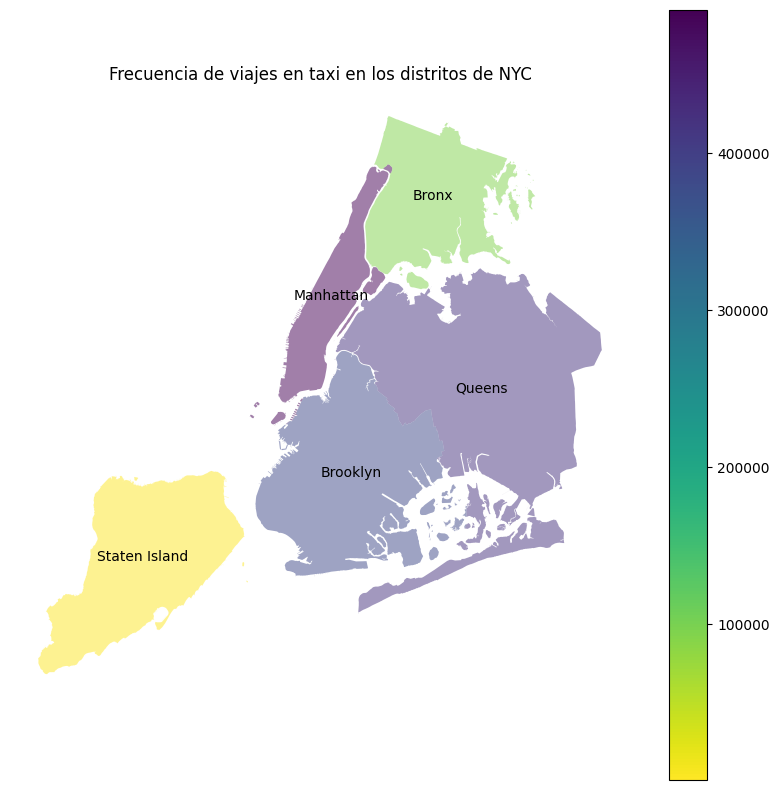

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
bc_geo.plot(column='count', cmap='viridis_r', alpha=0.5, ax=ax, legend=True)
bc_geo.apply(lambda x: ax.annotate(text=x.boroname, color='black', xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
plt.title("Frecuencia de viajes en taxi en los distritos de NYC")
plt.axis('off')

plt.show()

In [50]:
zip_file_path5 = "/content/drive/MyDrive/Octavo/Big Data/nynta.csv"

nbhoods = pd.read_csv(zip_file_path5)
nbhoods.head(5)

,the_geom,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area
0,MULTIPOLYGON (((-73.75205066516907 40.70522802...,4,Queens,81,QN08,St. Albans,45401.316803,7.741275e+07
1,MULTIPOLYGON (((-73.8870514253612 40.884349575...,2,Bronx,5,BX28,Van Cortlandt Village,21945.719299,2.566612e+07
2,MULTIPOLYGON (((-73.80576840191371 40.68293239...,4,Queens,81,QN55,South Ozone Park,36708.169305,8.246139e+07
3,MULTIPOLYGON (((-73.88833929256353 40.64671022...,3,Brooklyn,47,BK50,Canarsie,43703.609666,8.208968e+07
4,MULTIPOLYGON (((-73.8956088328007 40.854570369...,2,Bronx,5,BX41,Mount Hope,18937.247819,1.471671e+07


In [51]:
#There is a lot going on here... first rename the column
nbhoods.rename(columns={'NTAName':'neighbourhood'}, inplace=True)

#Then, since this is a csv file, convert the geometry column text into well known text, this will allow you to plot its geometry correctly
nbhoods['geom'] = nbhoods['the_geom'].apply(wkt.loads)

#Now convert the pandas dataframe into a Geopandas GeoDataFrame
nbhoods = gpd.GeoDataFrame(nbhoods, geometry='geom')

<Axes: >

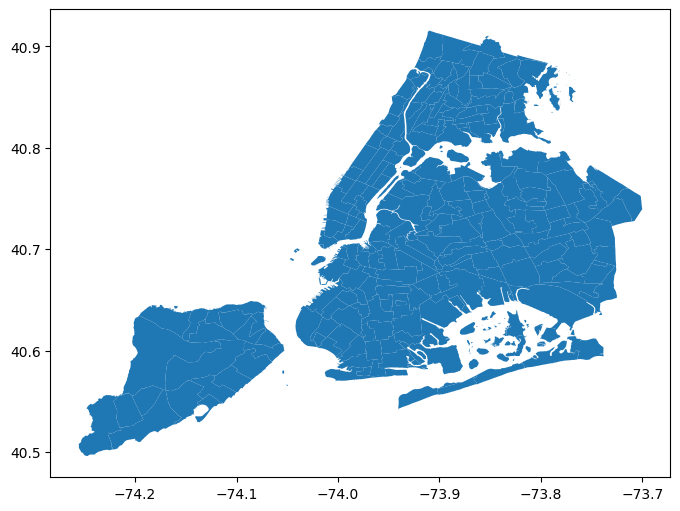

In [52]:
#Lets take a look at what the neighborhoods look like
fig,ax = plt.subplots(1,1, figsize=(8,8))
nbhoods.plot(ax=ax)

In [53]:
df_pandas.head()

,VendorID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,...,congestion_surcharge,LocationID,boroname,Zone,service_zone,pickup_timestamp,dropoff_timestamp,duracion_viaje_segundos,Latitude,Longitude
0,2.0,1.0,4.26,15.5,0.5,0.5,0.00,0.0,0.3,16.80,...,0.0,82,Queens,Elmhurst,Boro Zone,1559347388,1559348147,759,40.7282,-73.7949
1,2.0,1.0,2.87,11.5,0.5,0.5,2.56,0.0,0.3,15.36,...,0.0,82,Queens,Elmhurst,Boro Zone,1559348971,1559349658,687,40.7282,-73.7949
2,2.0,1.0,3.26,13.0,0.5,0.5,0.00,0.0,0.3,14.30,...,0.0,7,Queens,Astoria,Boro Zone,1559347845,1559348742,897,40.7282,-73.7949
3,2.0,1.0,1.18,7.0,0.5,0.5,0.00,0.0,0.3,8.30,...,0.0,82,Queens,Elmhurst,Boro Zone,1559349333,1559349787,454,40.7282,-73.7949
4,2.0,1.0,1.10,5.5,0.5,0.5,0.00,0.0,0.3,6.80,...,0.0,223,Queens,Steinway,Boro Zone,1559349257,1559349542,285,40.7282,-73.7949


In [54]:
df_pandas.rename(columns={"Zone": "neighbourhood"}, inplace=True)

# Ahora, la columna se llama "neighbourhood"
df_pandas.head()

,VendorID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,...,congestion_surcharge,LocationID,boroname,neighbourhood,service_zone,pickup_timestamp,dropoff_timestamp,duracion_viaje_segundos,Latitude,Longitude
0,2.0,1.0,4.26,15.5,0.5,0.5,0.00,0.0,0.3,16.80,...,0.0,82,Queens,Elmhurst,Boro Zone,1559347388,1559348147,759,40.7282,-73.7949
1,2.0,1.0,2.87,11.5,0.5,0.5,2.56,0.0,0.3,15.36,...,0.0,82,Queens,Elmhurst,Boro Zone,1559348971,1559349658,687,40.7282,-73.7949
2,2.0,1.0,3.26,13.0,0.5,0.5,0.00,0.0,0.3,14.30,...,0.0,7,Queens,Astoria,Boro Zone,1559347845,1559348742,897,40.7282,-73.7949
3,2.0,1.0,1.18,7.0,0.5,0.5,0.00,0.0,0.3,8.30,...,0.0,82,Queens,Elmhurst,Boro Zone,1559349333,1559349787,454,40.7282,-73.7949
4,2.0,1.0,1.10,5.5,0.5,0.5,0.00,0.0,0.3,6.80,...,0.0,223,Queens,Steinway,Boro Zone,1559349257,1559349542,285,40.7282,-73.7949


In [55]:
nbhood_count = df_pandas.groupby('neighbourhood').agg('count').reset_index()

In [56]:
#Lets merge the spatial GeoPandas Dataframe (with geometry), with the nbhood_count layer that is aggregated
nb_count_geo = nbhoods.merge(nbhood_count, on='neighbourhood')
nb_count_geo.head(3)

,the_geom,BoroCode,BoroName,CountyFIPS,NTACode,neighbourhood,Shape_Leng,Shape_Area,geom,VendorID,...,trip_type,congestion_surcharge,LocationID,boroname,service_zone,pickup_timestamp,dropoff_timestamp,duracion_viaje_segundos,Latitude,Longitude
0,MULTIPOLYGON (((-73.8870514253612 40.884349575...,2,Bronx,5,BX28,Van Cortlandt Village,21945.719299,2.566612e+07,"MULTIPOLYGON (((-73.88705 40.88435, -73.88705 ...",1299,...,1299,1299,1655,1655,1655,1655,1655,1655,1655,1655
1,MULTIPOLYGON (((-73.80576840191371 40.68293239...,4,Queens,81,QN55,South Ozone Park,36708.169305,8.246139e+07,"MULTIPOLYGON (((-73.80577 40.68293, -73.80552 ...",1358,...,1358,1358,1909,1909,1909,1909,1909,1909,1909,1909
2,MULTIPOLYGON (((-73.88833929256353 40.64671022...,3,Brooklyn,47,BK50,Canarsie,43703.609666,8.208968e+07,"MULTIPOLYGON (((-73.88834 40.64671, -73.88835 ...",2777,...,2777,2777,4444,4444,4444,4444,4444,4444,4444,4444


/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:695: UserWarning:

The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.



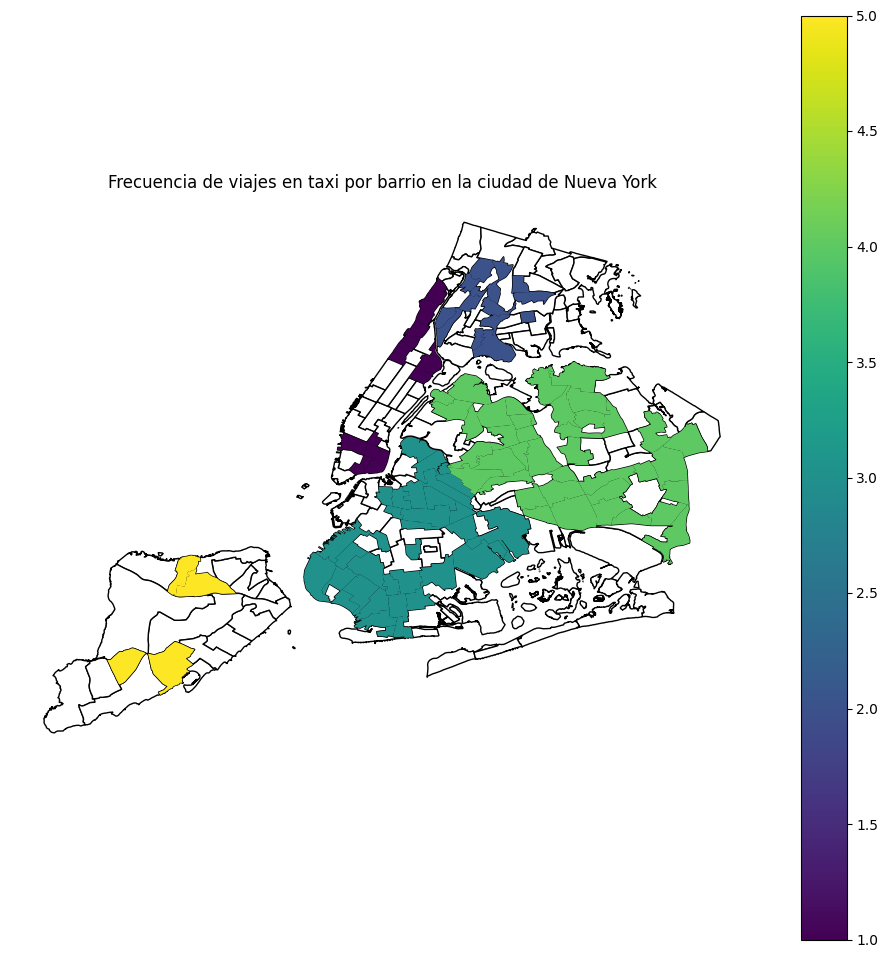

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Ajusta el esquema de colores y los límites de la escala según tus datos
vmin = nb_count_geo['BoroCode'].min()
vmax = nb_count_geo['BoroCode'].max()

base = nbhoods.plot(color='white', edgecolor='black', ax=ax)
nb_count_geo.plot(column='BoroCode', cmap='viridis', ax=base, legend=True, vmin=vmin, vmax=vmax)

# Añade un título descriptivo
plt.title("Frecuencia de viajes en taxi por barrio en la ciudad de Nueva York")

# Añade un borde o sombreado a las áreas sin datos
nbhoods[nbhoods['BoroCode'].isna()].plot(ax=ax, color='lightgray', hatch='///')

plt.axis('off')
plt.show()